<a href="https://colab.research.google.com/github/vidhi-01/Brain-Tumor-Classification-with-Neural-Networks/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 96% 142M/149M [00:00<00:00, 178MB/s]
100% 149M/149M [00:00<00:00, 191MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  class_paths = []
  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)# Check if it's a directory
    if os.path.isdir(label_path):# Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path,image)# Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)
    # Create a DataFrame with the collected data
    df = pd.DataFrame({
    'Class Path': class_paths,
    'Class': classes
    })
  return df

In [ ]:
tr_df = get_class_paths("/content/Training")

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0794.jpg,notumor
1,/content/Training/notumor/Tr-no_1039.jpg,notumor
2,/content/Training/notumor/Tr-no_0972.jpg,notumor
3,/content/Training/notumor/Tr-no_0559.jpg,notumor
4,/content/Training/notumor/Tr-no_1252.jpg,notumor
...,...,...
5707,/content/Training/glioma/Tr-gl_0255.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0182.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0553.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0380.jpg,glioma


In [ ]:
ts_df = get_class_paths("/content/Testing")

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0097.jpg,notumor
1,/content/Testing/notumor/Te-no_0301.jpg,notumor
2,/content/Testing/notumor/Te-noTr_0000.jpg,notumor
3,/content/Testing/notumor/Te-no_0222.jpg,notumor
4,/content/Testing/notumor/Te-no_0139.jpg,notumor
...,...,...
1306,/content/Testing/glioma/Te-gl_0280.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0163.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0194.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0146.jpg,glioma


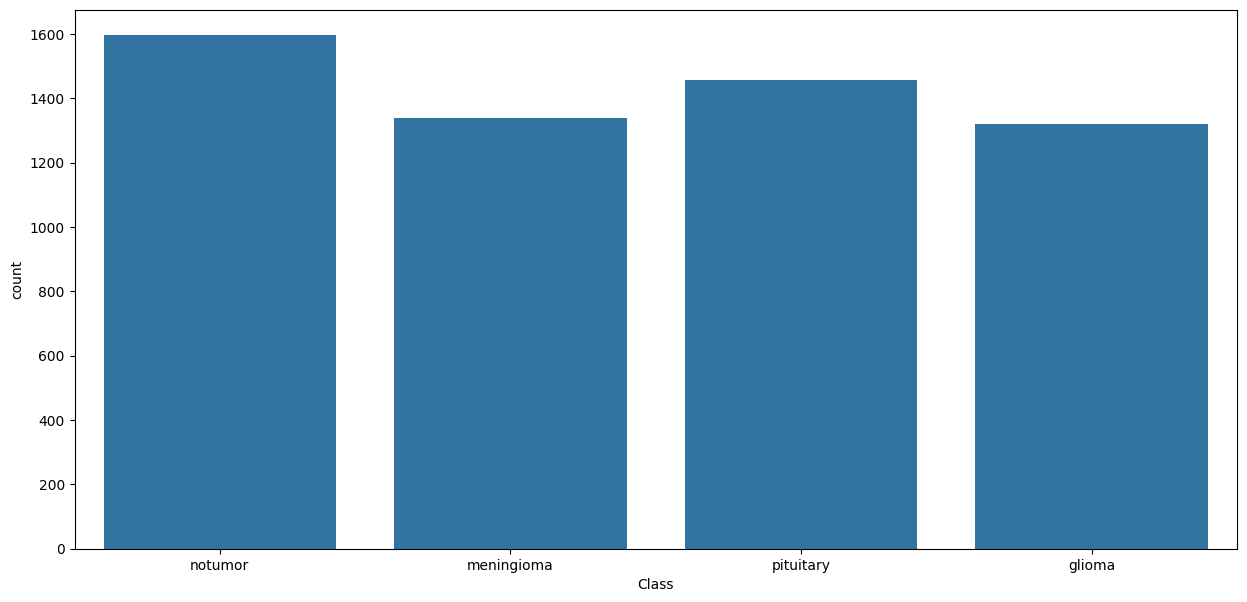

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data = tr_df, x=tr_df['Class'])

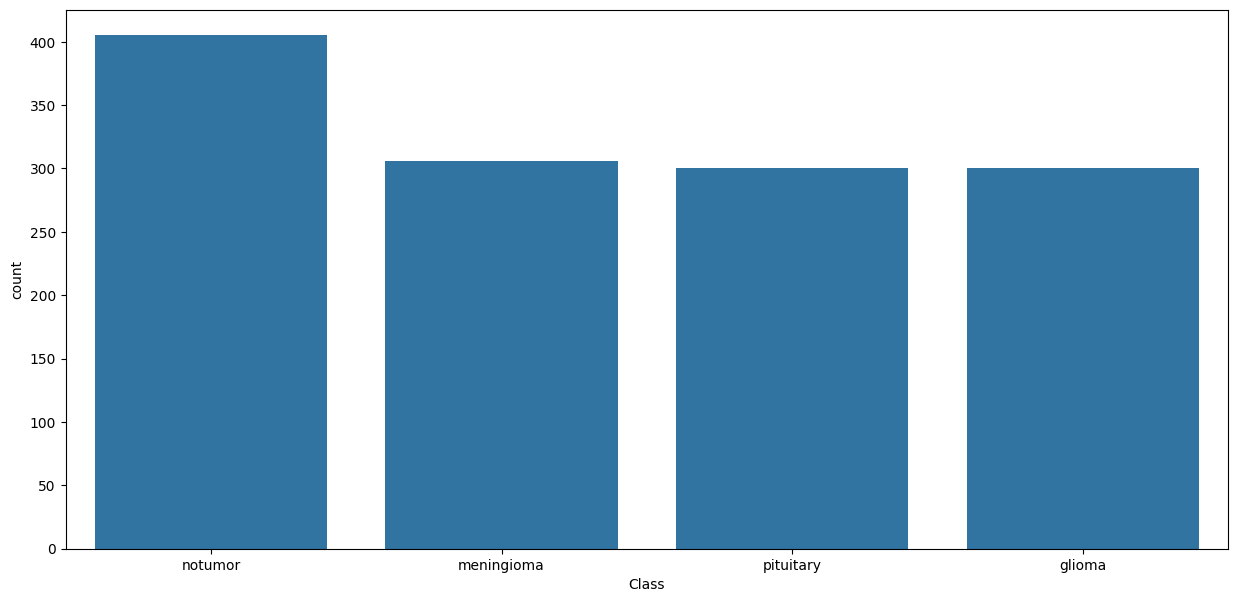

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data = ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
846,/content/Testing/pituitary/Te-pi_0277.jpg,pituitary
832,/content/Testing/pituitary/Te-pi_0223.jpg,pituitary
717,/content/Testing/pituitary/Te-pi_0282.jpg,pituitary
1188,/content/Testing/glioma/Te-gl_0070.jpg,glioma
566,/content/Testing/meningioma/Te-me_0115.jpg,meningioma
...,...,...
443,/content/Testing/meningioma/Te-me_0233.jpg,meningioma
666,/content/Testing/meningioma/Te-me_0280.jpg,meningioma
688,/content/Testing/meningioma/Te-me_0055.jpg,meningioma
98,/content/Testing/notumor/Te-no_0223.jpg,notumor


In [ ]:
ts_df

,Class Path,Class
1269,/content/Testing/glioma/Te-gl_0275.jpg,glioma
453,/content/Testing/meningioma/Te-me_0112.jpg,meningioma
1257,/content/Testing/glioma/Te-gl_0120.jpg,glioma
264,/content/Testing/notumor/Te-no_0185.jpg,notumor
753,/content/Testing/pituitary/Te-pi_0289.jpg,pituitary
...,...,...
352,/content/Testing/notumor/Te-no_0277.jpg,notumor
470,/content/Testing/meningioma/Te-me_0130.jpg,meningioma
1070,/content/Testing/glioma/Te-gl_0046.jpg,glioma
1211,/content/Testing/glioma/Te-gl_0214.jpg,glioma


In [ ]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col = 'Class Path', y_col ='Class', batch_size=batch_size, target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col = 'Class Path', y_col ='Class', batch_size=batch_size, target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col = 'Class Path', y_col ='Class', batch_size=16, target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


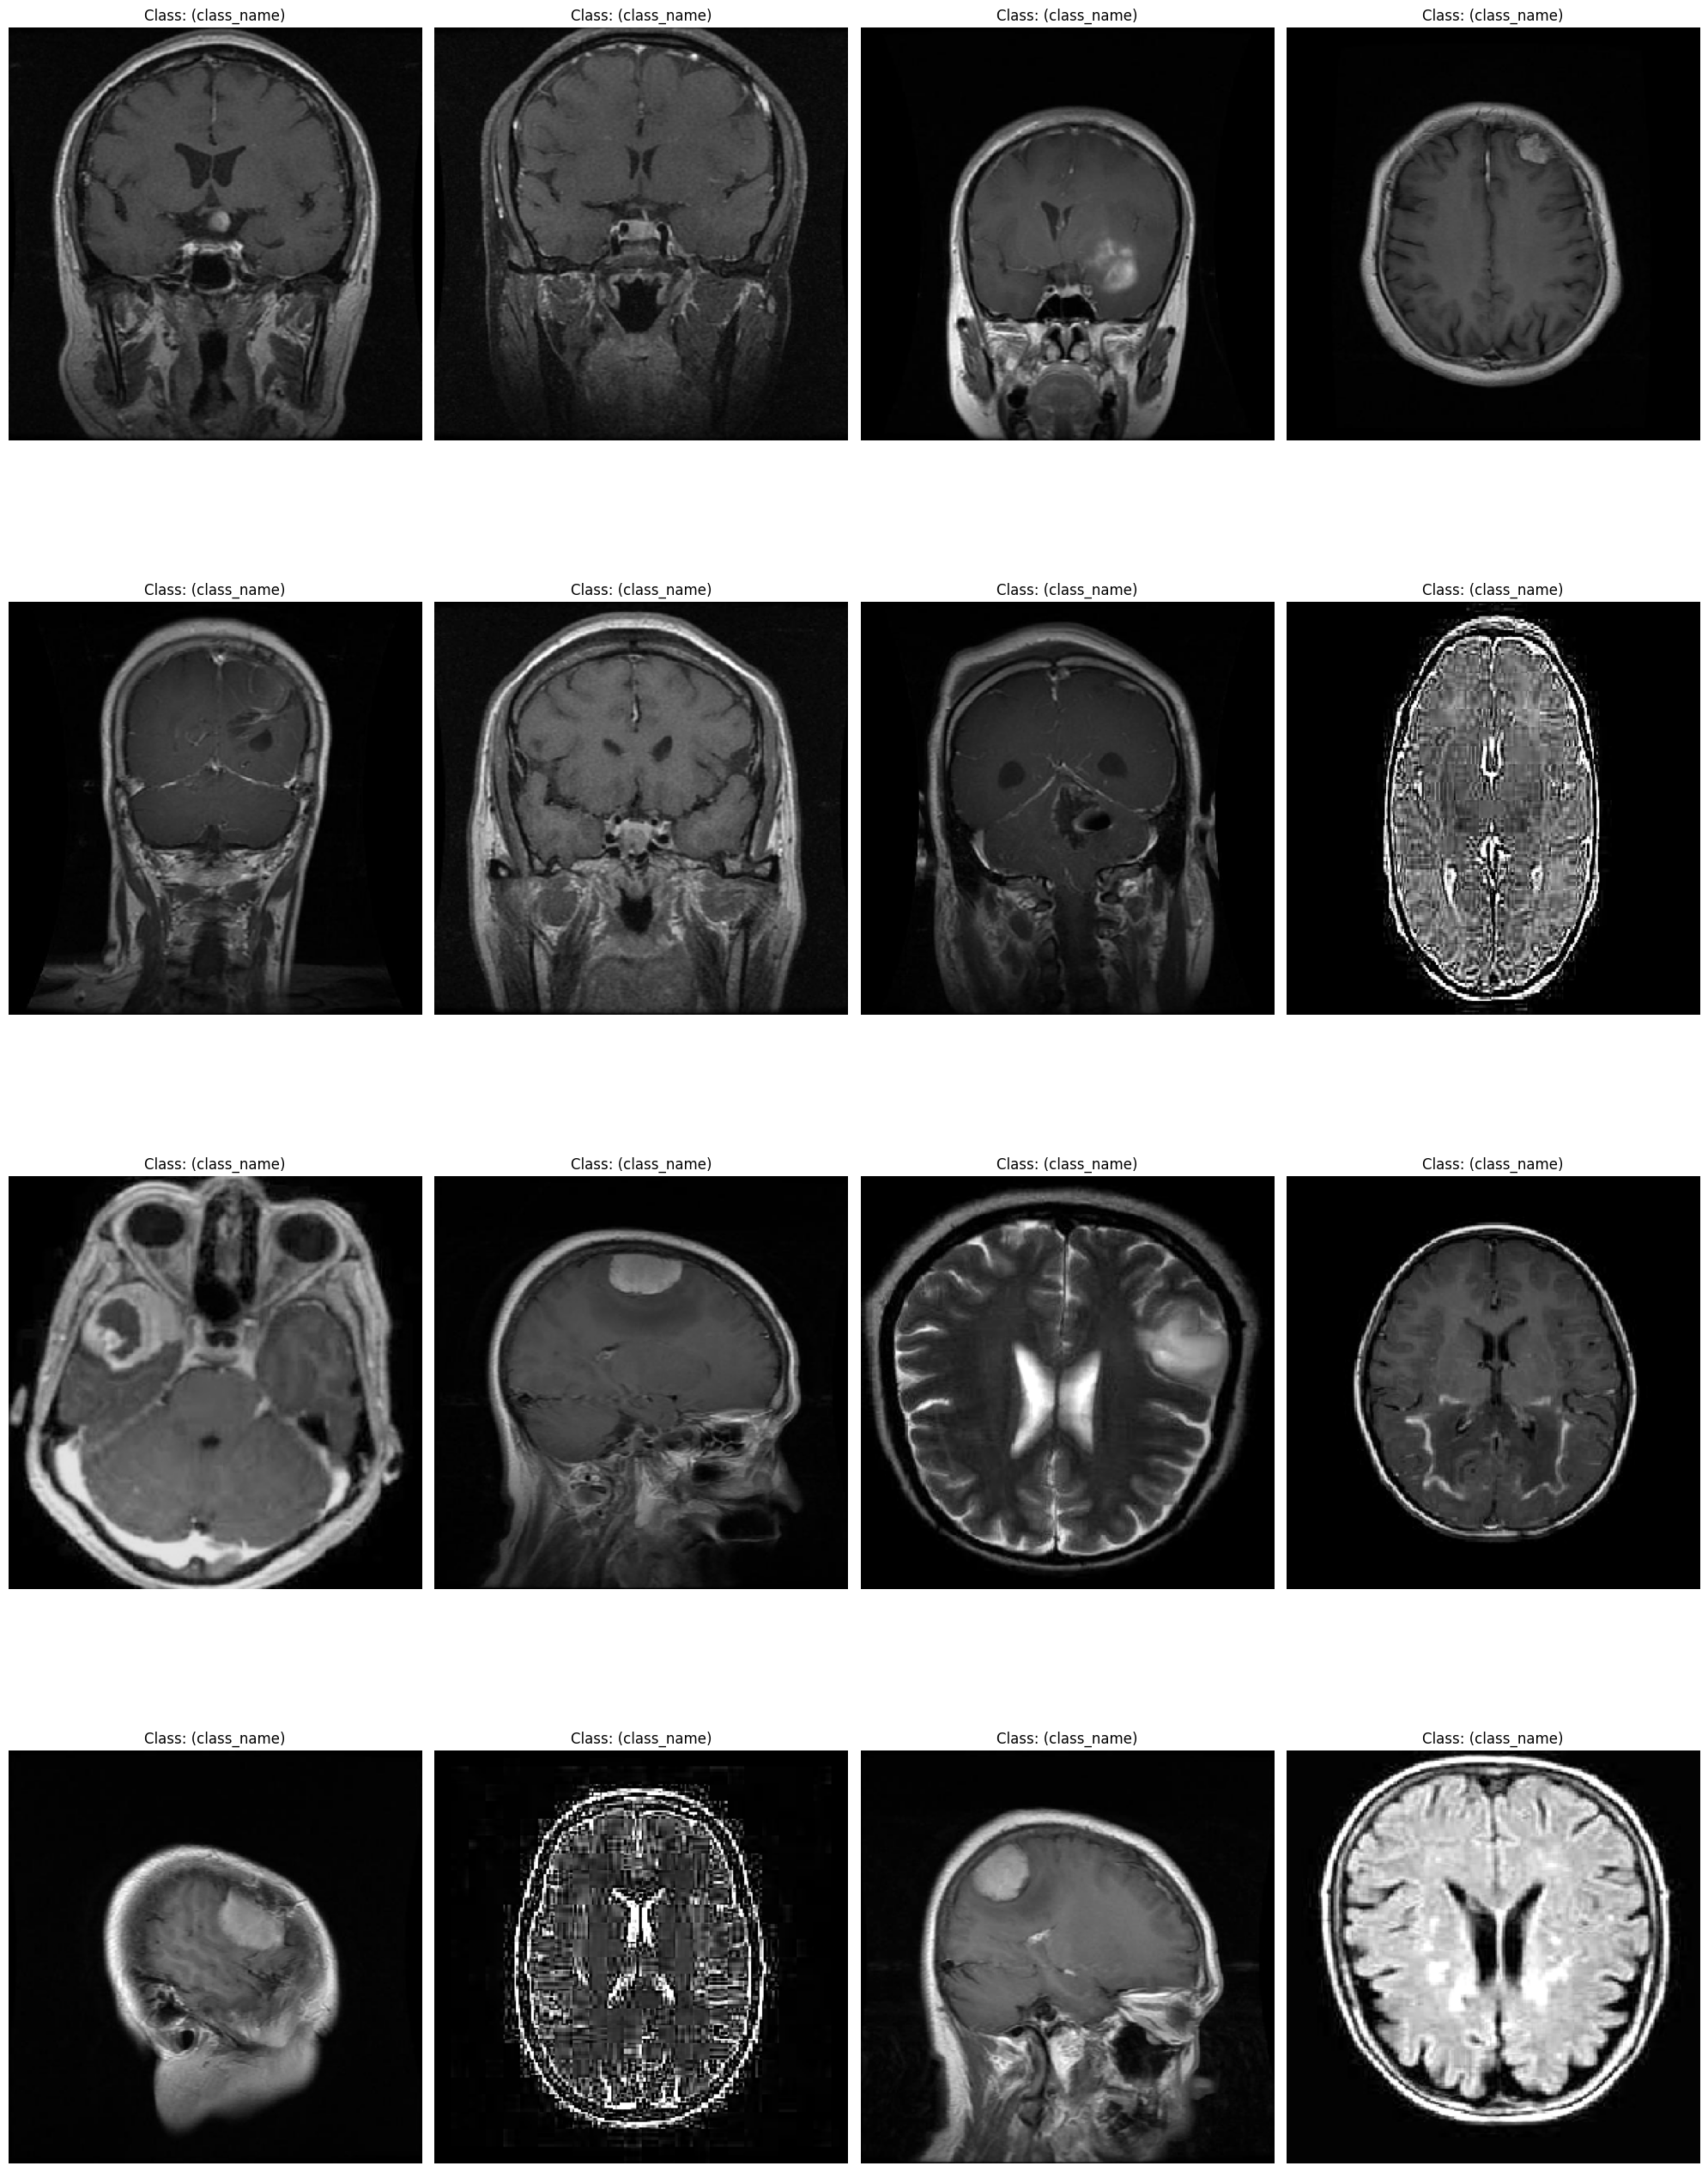

In [ ]:
plt.figure(figsize=(20, 28))
for i in range (16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)
  class_index = np.argmax(label)
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())
  index_position = class_indices.index(class_index)
  class_name = class_names [index_position]
  plt.title(f"Class: (class_name)")
  plt.axis('off')
plt.tight_layout ()
plt.show()

In [ ]:
from threading import active_count
img_shape=(299, 299,3)

base_model = tf.keras.applications.Xception(include_top=False,
                                           weights="imagenet",
                                           input_shape=img_shape,
                                           pooling='max')
model= Sequential([base_model,
                   Flatten(),
                   Dropout(rate=0.3),
                  Dense(128, activation='relu'),
                  Dropout(rate=0.25),
                   Dense(4, activation='softmax')
                   ])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy',
                      Precision(),
                      Recall()])

In [ ]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.7014 - loss: 0.8896 - precision: 0.7973 - recall: 0.5118 - val_accuracy: 0.8107 - val_loss: 0.5145 - val_precision: 0.8246 - val_recall: 0.7969
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 158s 818ms/step - accuracy: 0.9666 - loss: 0.0914 - precision: 0.9718 - recall: 0.9647 - val_accuracy: 0.9740 - val_loss: 0.0751 - val_precision: 0.9785 - val_recall: 0.9740
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 147s 812ms/step - accuracy: 0.9928 - loss: 0.0270 - precision: 0.9931 - recall: 0.9905 - val_accuracy: 0.9191 - val_loss: 0.2875 - val_precision: 0.9187 - val_recall: 0.9145
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 148s 819ms/step - accuracy: 0.9914 - loss: 0.0272 - precision: 0.9921 - recall: 0.9905 - val_accuracy: 0.9847 - val_loss: 0.0429 - val_precision: 0.9847 - val_recall: 0.9847
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 205s 835ms/step - accuracy: 0.9953 - loss: 0.0196 - precision: 0.9953 - recall: 0.9948 - val_accuracy: 0.9893 - val_loss: 

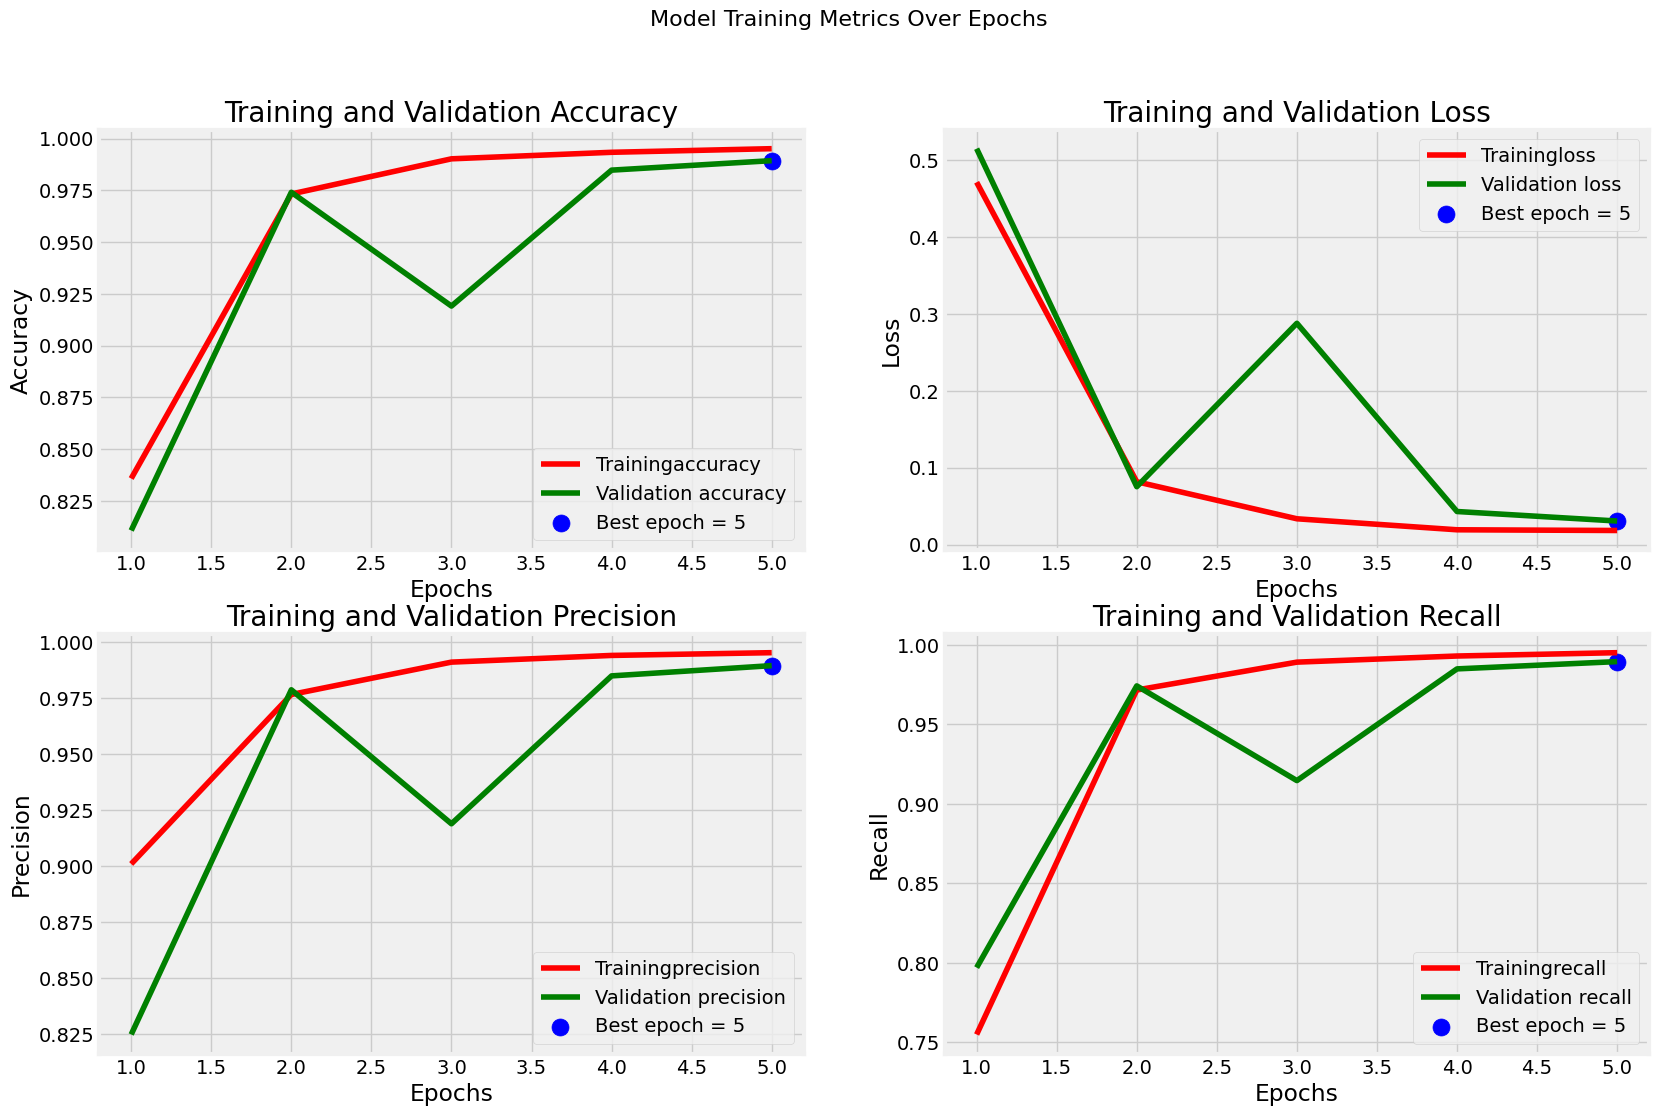

In [ ]:
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m] )
  best_epochs[m] = idx + 1
  best_values[m] =val_metrics[m][idx]
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')
for i, metric in enumerate (metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)
  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training{metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel (metric.title())
  plt.legend()
  plt.grid(True)
plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt. show()

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score [1]*100: .2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score [1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 319ms/step - accuracy: 0.9998 - loss: 9.6527e-04 - precision: 0.9998 - recall: 0.9998
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.9921 - loss: 0.0239 - precision: 0.9921 - recall: 0.9921
 1/41 ━━━━━━━━━━━━━━━━━━━━ 8s 206ms/step - accuracy: 1.0000 - loss: 0.0027 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9912 - loss: 0.0227 - precision: 0.9912 - recall: 0.9912
Train Accuracy: 99.93%
Train Loss: 0.0019


Validation Accuracy:  99.24%
Validation Loss: 0.0232


Test Accuracy: 98.78%
Test Loss: 0.0303


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

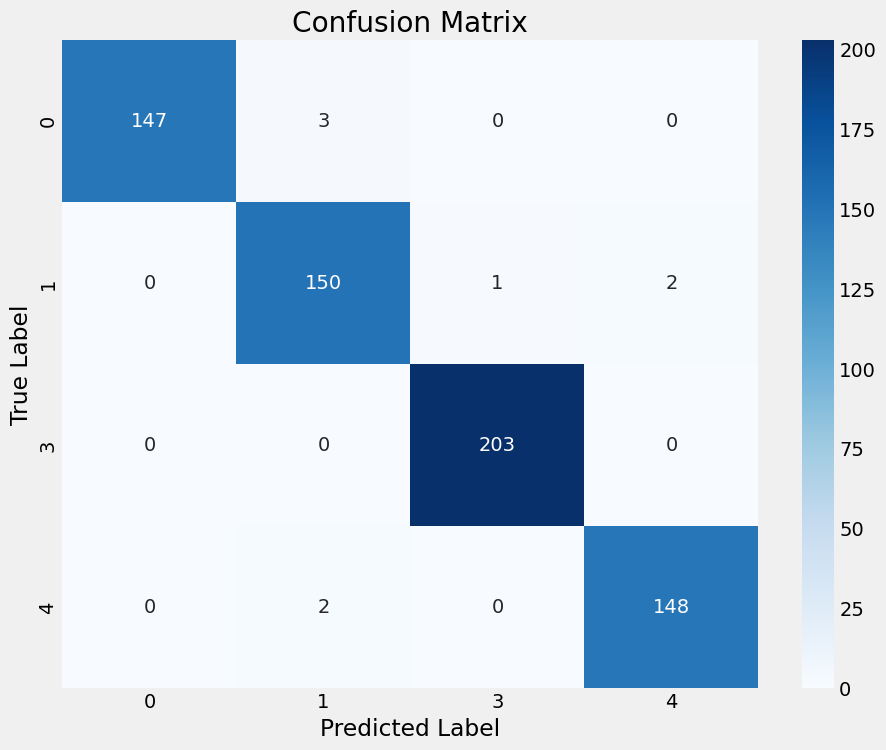

In [ ]:
preds = model. predict(ts_gen)
y_pred = np.argmax(preds, axis=1)
class_dict = {
  0: 'glioma',
  1:'meningioma',
  3: 'no_tumor',
  4: 'pituitary'
}
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list (class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel ('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show

In [ ]:
from PIL import Image
def predict(img_path: str) -> None:
  labels = list(class_dict.keys())
  plt.figure(figsize=(6, 8))
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict [predicted_class_idx]
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel ("Probability", fontsize=15)
  plt.title("Class Probabilities")
  ax = plt.gca()
  ax.bar_label (bars, fmt="%.2f")
  plt.tight_layout ()
  plt.show()
  print(f"Predicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


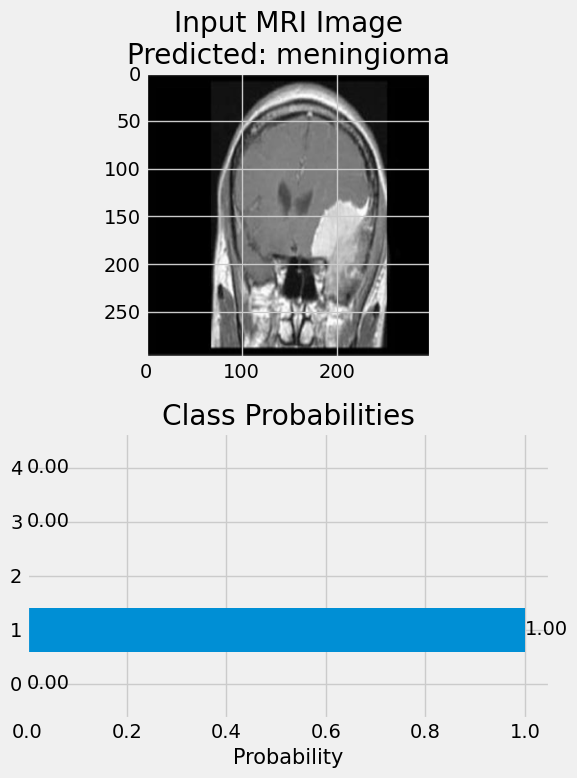

Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [ ]:
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(tr_df, x_col = 'Class Path', y_col ='Class', batch_size=batch_size, target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col = 'Class Path', y_col ='Class', batch_size=batch_size, target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col = 'Class Path', y_col ='Class', batch_size=16, target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
cnn_model = Sequential()
# Convolutional layers
cnn_model.add(Conv2D (512, (3, 3), padding='same', input_shape=(224,224,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout (0.25))
cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout (0.25))
cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout (0.35))
cnn_model.add(Dense(4, activation='softmax')) # Output layer with 4 neurons for the 4 classes
# Compile the model
cnn_model.compile(Adamax( learning_rate = 0.001), loss='categorical_crossentropy', metrics= ['accuracy', Precision() ,Recall()])
# Display the model summary
cnn_model.summary ()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 148s 344ms/step - accuracy: 0.5615 - loss: 2.3652 - precision_1: 0.6846 - recall_1: 0.3911 - val_accuracy: 0.7725 - val_loss: 0.8939 - val_precision_1: 0.8204 - val_recall_1: 0.7252
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 161s 295ms/step - accuracy: 0.8180 - loss: 0.7255 - precision_1: 0.8408 - recall_1: 0.7834 - val_accuracy: 0.8382 - val_loss: 0.5964 - val_precision_1: 0.8727 - val_recall_1: 0.8061
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 145s 304ms/step - accuracy: 0.8620 - loss: 0.5333 - precision_1: 0.8754 - recall_1: 0.8402 - val_accuracy: 0.8824 - val_loss: 0.4889 - val_precision_1: 0.8973 - val_recall_1: 0.8534
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 107s 297ms/step - accuracy: 0.8881 - loss: 0.4337 - precision_1: 0.9001 - recall_1: 0.8736 - val_accuracy: 0.8977 - val_loss: 0.3979 - val_precision_1: 0.9048 - val_recall_1: 0.8855
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 105s 293ms/step - accuracy: 0.9099 - loss: 0.3690 - precision_1: 0.9178 - recall_1: 0.9

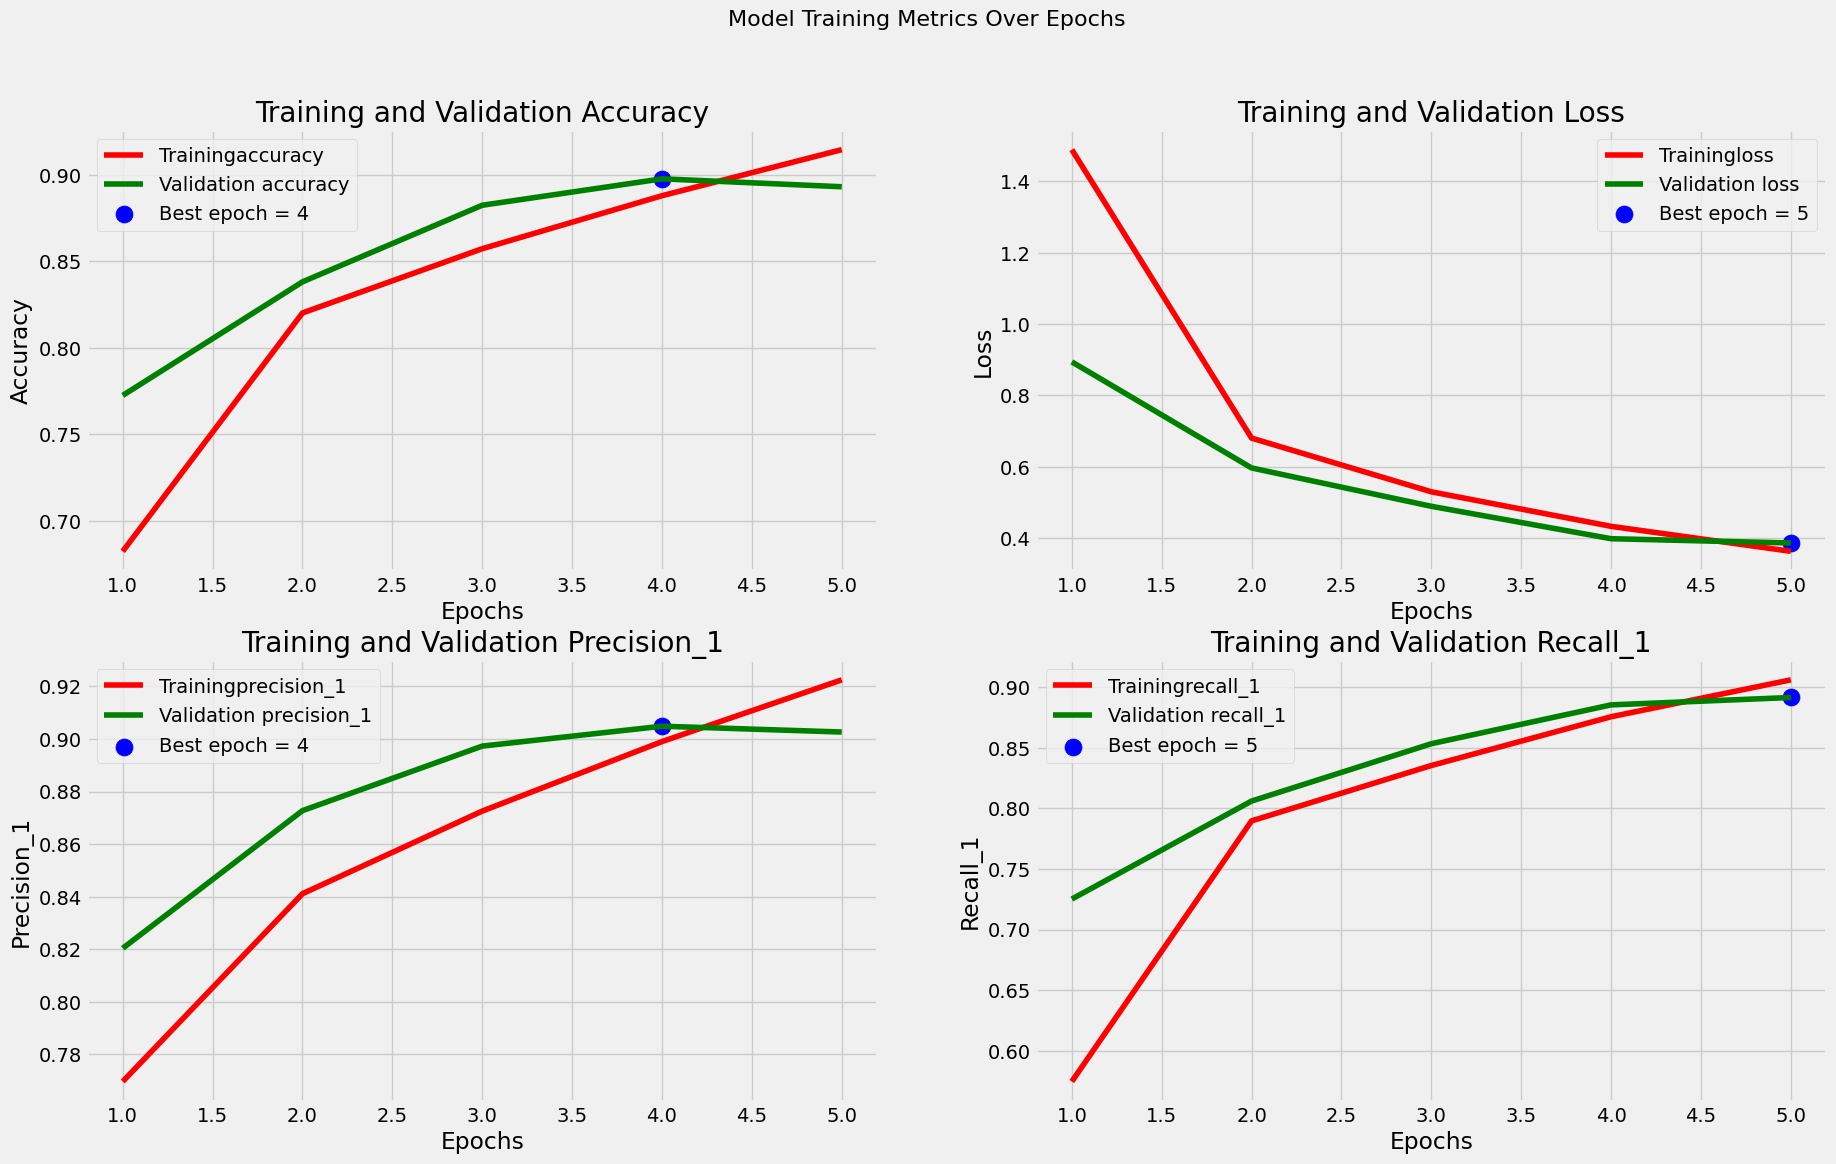

In [ ]:
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m] )
  best_epochs[m] = idx + 1
  best_values[m] =val_metrics[m][idx]
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')
for i, metric in enumerate (metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)
  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training{metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel (metric.title())
  plt.legend()
  plt.grid(True)
plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt. show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score [1]*100: .2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score [1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.9362 - loss: 0.3081 - precision_1: 0.9417 - recall_1: 0.9321
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.8933 - loss: 0.4099 - precision_1: 0.8951 - recall_1: 0.8896
 2/41 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8594 - loss: 0.4152 - precision_1: 0.8527 - recall_1: 0.8125 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8726 - loss: 0.4397 - precision_1: 0.8720 - recall_1: 0.8564
Train Accuracy: 94.54%
Train Loss: 0.2918


Validation Accuracy:  90.38%
Validation Loss: 0.3770


Test Accuracy: 88.26%
Test Loss: 0.4258


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

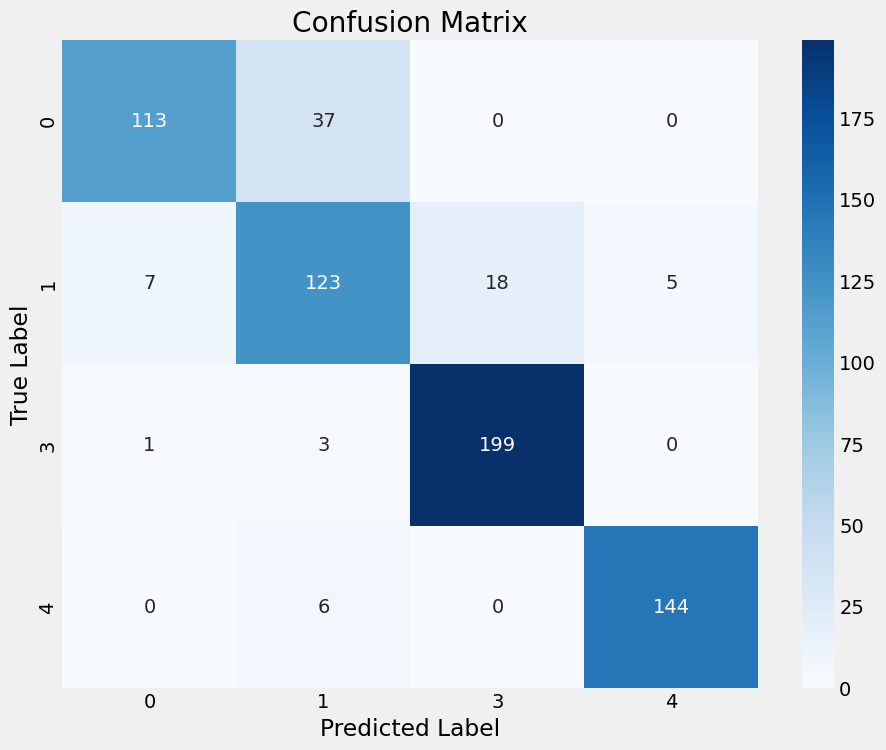

In [ ]:
preds = cnn_model. predict(ts_gen)
y_pred = np.argmax(preds, axis=1)
class_dict = {
  0: 'glioma',
  1:'meningioma',
  3: 'no_tumor',
  4: 'pituitary'
}
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list (class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel ('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       150
           1       0.73      0.80      0.76       153
           2       0.92      0.98      0.95       203
           3       0.97      0.96      0.96       150

    accuracy                           0.88       656
   macro avg       0.89      0.87      0.88       656
weighted avg       0.89      0.88      0.88       656



In [ ]:
cnn_model.save("cnn_model.h5")

Part-2 Streamlit Web App

In [ ]:
!pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok

In [ ]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata
import os

In [ ]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [ ]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import  image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)


def generate_explanation(img_path, model_prediction, confidence):
  prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
  The saliency map was generated by a deep learning model that was trained to classify brain tumors as either glioma, meningiona, pituitary, or no tumor.

  The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

  The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

  In your response:
  - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted in light cyan, those are the regions where the model is focusing on.
  - Explain possible reasons why the model made the prediction it did.
  - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan* in your explanation.
  - Keep your explanation to 4 sentences max.

  Let's think step by step about this. Verify step by step.
  """
  img = PIL.Image.open(img_path)
  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt, img])
  return response.text


def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]
  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients = gradients.numpy().squeeze()
  # Resize gradients to match original image size
  gradients = cv2.resize(gradients, img_size)
  # Create a circular mask for the brain area
  center = (gradients.shape [0] // 2, gradients.shape [1] // 2)
  radius = min(center [0], center [1]) - 10
  y, x = np.ogrid[:gradients.shape [0], :gradients.shape[1]]
  mask = (x - center [0])**2 + (y - center [1])**2 <= radius**2
  # Apply mask to gradients
  gradients = gradients * mask
  # Normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients
  # Apply a higher threshold
  threshold = np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] = 0
  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)
  # Create a heatmap overlay with enhanced contrast
  heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
  # Resize heatmap to match original image size
  heatmap = cv2.resize(heatmap, img_size)

  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)
  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())
  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  # Save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR) )
  return superimposed_img

def load_xception_model(model_path):
  img_shape=(299,299,3)
  base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",
                                              input_shape=img_shape, pooling='max')
  model = Sequential([base_model, Flatten(),
                      Dropout(rate=0.3),
                      Dense(128, activation='relu'),
                      Dropout(rate=0.25),
                      Dense(4, activation='softmax')
  ])
  model.build( (None,) + img_shape)
  # Compile the model
  model.compile(Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy',
                         Precision(),
                         Recall()])
  model.load_weights(model_path)
  return model

st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xception", "Custom CNN")
  )
  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299, 299)
  else:
    model = load_model('/content/cnn_model.h5')
    img_size=(224, 224)

  labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0
  prediction = model.predict(img_array)
  # Get the class with the highest probability
  class_index = np.argmax(prediction[0])
  result = labels [class_index]
  st.write(f"Predicted Class: {result}")
  st.write("Predictions:")
  for label, prob in zip(labels, prediction[0]):
    st.write(f"{label}: {prob:.4f}")

  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)
  with col1:
    st.image(uploaded_file, caption='Uploaded Image', use_container_width=True)
  with col2:
    st.image(saliency_map, caption='Saliency Map', use_container_width=True)

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

  st.write("## Explanation")
  st.write(explanation)


Overwriting app.py


In [ ]:
thread = Thread(target=run_streamlit)
thread.start()

In [ ]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls = True)

print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://a710-34-124-231-42.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"CLossing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

CLossing tunnel: https://a8cc-34-124-231-42.ngrok-free.app -> http://localhost:8501


CLossing tunnel: https://2fa0-34-124-231-42.ngrok-free.app -> http://localhost:8501


CLossing tunnel: https://e45e-34-124-231-42.ngrok-free.app -> http://localhost:8501


Writing .env
